# DATASET ANALYSIS

## IMPORTS


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output



In [2]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


## LOAD DATASET


In [3]:
# Let's load the dataset
data = pd.read_csv('data/synth_data_for_training.csv')

# Let's specify the features and the target
y = data['checked']
X = data.drop(['checked'], axis=1)
X = X.astype(np.float32)

# Let's split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## SHOW DATASET FEATURES

In [4]:
for column in X.columns:
    print(column)

adres_aantal_brp_adres
adres_aantal_verschillende_wijken
adres_aantal_verzendadres
adres_aantal_woonadres_handmatig
adres_dagen_op_adres
adres_recentst_onderdeel_rdam
adres_recentste_buurt_groot_ijsselmonde
adres_recentste_buurt_nieuwe_westen
adres_recentste_buurt_other
adres_recentste_buurt_oude_noorden
adres_recentste_buurt_vreewijk
adres_recentste_plaats_other
adres_recentste_plaats_rotterdam
adres_recentste_wijk_charlois
adres_recentste_wijk_delfshaven
adres_recentste_wijk_feijenoord
adres_recentste_wijk_ijsselmonde
adres_recentste_wijk_kralingen_c
adres_recentste_wijk_noord
adres_recentste_wijk_other
adres_recentste_wijk_prins_alexa
adres_recentste_wijk_stadscentru
adres_unieke_wijk_ratio
afspraak_aanmelding_afgesloten
afspraak_aantal_woorden
afspraak_afgelopen_jaar_afsprakenplan
afspraak_afgelopen_jaar_monitoring_insp__wet_taaleis_na_12_mnd_n_a_v__taa04_____geen_maatregel
afspraak_afgelopen_jaar_ontheffing
afspraak_afgelopen_jaar_ontheffing_taaleis
afspraak_afgelopen_jaar_plan_va

## DISTRIBUTION OF TARGET VALUE

<Axes: xlabel='checked', ylabel='count'>

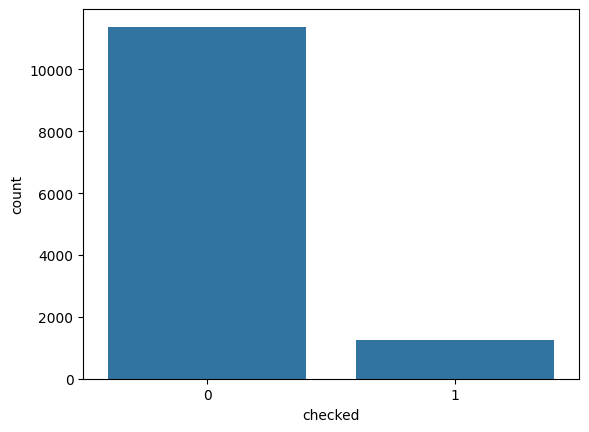

In [5]:
# Visualize the distribution of the target variable 'checked'
sns.countplot(x='checked', data=data)

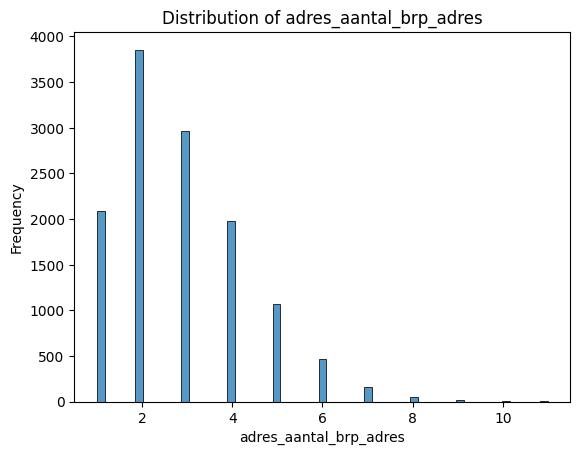

In [6]:
# Create a dropdown menu with all the features
feature_dropdown = widgets.Dropdown(
    options=data.columns,
    description='Feature:',
)

# Define a function to update the plot when a new feature is selected
def update_plot(feature):
    clear_output(wait=True)  # Clear the current output
    sns.histplot(data=data, x=feature, legend=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.show()

# Display the dropdown menu and the initial plot
display(feature_dropdown)
update_plot(feature_dropdown.value)

# Call the update_plot function when a new feature is is selected
feature_dropdown.observe(lambda change: update_plot(change.new), names='value')